In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import glob
import fastText
import nltk
import gensim
import json
import gzip
import io
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avivs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df= pd.read_excel("words.xlsx")
df.head()

,word,freq,Noun,1st Body,ConciousWord,Verb,Past,Present,Future,Other,Adjective,Adverb,Infinitive,Emotion,Name
0,conciousword,2409,0,0,0,0,0,0,0,0,0,0,0,0,0
1,pst1fst,1765,0,0,0,0,0,0,0,0,0,0,0,0,0
2,לא,1604,0,0,0,0,0,0,0,1,0,0,0,0,0
3,זה,1050,0,0,0,0,0,0,0,1,0,0,0,0,0
4,אני,987,0,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
import re
pattern = re.compile("[A-Za-z]+")
english_words =[]

for word in df['word']:
    if pattern.fullmatch(word):
        english_words.append(word)

In [5]:
english_words

['conciousword',
 'spectoken',
 'break',
 'laugh',
 'unclear',
 'ct',
 'shit',
 'happens',
 'alert',
 'doing',
 'there',
 'jobs',
 'ups',
 'and',
 'downs',
 'out',
 'cool',
 'mri',
 'all',
 'over',
 'the',
 'place']

In [6]:
df.shape[0]

7986

In [7]:
# We seperate the tagged words to groups
from collections import defaultdict
groups = defaultdict(list)
    
for i,word in enumerate(df["word"]):
    for c in range(2,(len(df.columns)),1):
        if df[df.columns[c]][i] == 1:
            groups[df.columns[c]].append(word)

In [8]:
groups.keys()

dict_keys(['Other', '1st Body', 'Verb', 'Past', 'Adverb', 'Noun', 'ConciousWord', 'Present', 'Adjective', 'Name', 'Emotion', 'Infinitive', 'Future'])

In [10]:
#all files of patients before treatment
beforeArr = []
for index in range(1, 21):
    name = "{index}.txt".format(index=index)
    path = os.path.join('before/', name)
    with io.open(path, mode="r", encoding="utf-8") as fd:
        content = fd.read()
        content = re.sub(r'\d{1,2}\.\d{1,2}\.\d{2,4}', 'date', content)
        beforeArr.append(content.lower())

In [11]:
#all files of patients after treatment
afterArr = []
for index in range(1, 21):
    name = "{index}.txt".format(index=index)
    path = os.path.join('after/', name)
    with io.open(path, mode="r", encoding="utf-8") as fd:
        content = fd.read()
        content = re.sub(r'\d{1,2}\.\d{1,2}\.\d{2,4}', 'date', content)
        afterArr.append(content.lower())

In [12]:
df.columns

Index(['word', 'freq', 'Noun', '1st Body', 'ConciousWord', 'Verb', 'Past',
       'Present', 'Future', 'Other', 'Adjective', 'Adverb', 'Infinitive',
       'Emotion', 'Name'],
      dtype='object')

<br>

<br>

<br>

## Patients dataframe <br>- including the ratio between before and after treatment for each group and patient

In [27]:
patientsdf= pd.read_excel("before_and_after.xlsx")
if "Unnamed: 0" in patientsdf.columns:
    patientsdf = patientsdf.drop(columns="Unnamed: 0")
patientsdf.head()

,Patient,Noun Before,1st Body Before,ConciousWord Before,Verb Before,Past Before,Present Before,Future Before,Other Before,Adjective Before,...,Verb Ratio,Past Ratio,Present Ratio,Future Ratio,Other Ratio,Adjective Ratio,Adverb Ratio,Infinitive Ratio,Emotion Ratio,Name Ratio
0,0,0.225,0.077,0.031,0.187,0.112,0.075,0.000,0.311,0.059,...,1.191,0.991,2.206,0.000,1.280,1.341,0.778,0.906,1.625,0.667
1,1,0.217,0.114,0.010,0.189,0.100,0.071,0.018,0.243,0.044,...,1.005,1.010,1.000,1.000,0.946,0.978,1.131,0.857,0.800,1.000
2,2,0.156,0.096,0.001,0.186,0.131,0.050,0.014,0.279,0.036,...,0.903,0.766,1.429,1.750,1.187,1.800,1.109,1.107,3.333,0.300
3,3,0.168,0.091,0.008,0.171,0.104,0.053,0.014,0.281,0.068,...,1.082,1.010,1.152,1.400,1.115,1.511,0.918,0.839,2.500,1.125
4,4,0.242,0.094,0.015,0.156,0.099,0.044,0.013,0.252,0.068,...,1.020,0.971,0.863,1.182,0.920,1.333,0.861,1.632,0.778,1.800


In [125]:
def RatioEachGroupInFile(file):
    
    file_groups = {}
    
    for key,val in groups.items():
         file_groups[key] = float( '%.3f' % ( sum([sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), file)) for word in val]) / len(file.split()) ) )
   
    return file_groups

In [126]:
patientsdf.columns[1:14]

Index(['Noun Before', '1st Body Before', 'ConciousWord Before', 'Verb Before',
       'Past Before', 'Present Before', 'Future Before', 'Other Before',
       'Adjective Before', 'Adverb Before', 'Infinitive Before',
       'Emotion Before', 'Name Before'],
      dtype='object')

In [127]:
#sum of words from each group in files before treatment

for i_patient,file in enumerate(beforeArr):
    
    ratio_each_group_in_file= RatioEachGroupInFile(file)
    for col in patientsdf.columns[1:14]:
        key= col.split()
        key = " ".join(key[0:-1])
        patientsdf.loc[i_patient, col] = ratio_each_group_in_file.get(key,0) 

In [128]:
#sum of words from each group in files after treatment

for i_patient,file in enumerate(afterArr):
    
    ratio_each_group_in_file= RatioEachGroupInFile(file)
    for col in patientsdf.columns[14:27]:
        key= col.split()
        key = " ".join(key[0:-1])
        patientsdf.loc[i_patient, col] = ratio_each_group_in_file.get(key,0)

In [129]:
def Value_Ratio(a,b):
    if b==0:
        return None
    return float('%.3f' % (a/b))

In [130]:
#The ratio of words from each group before and after treatment for each patient
for i_patient in range(0,len(afterArr)):
   
    for col in patientsdf.columns[27:40]:
        key= col.split()
        key = " ".join(key[0:-1])
        patientsdf.loc[i_patient, col] = Value_Ratio(patientsdf[key+' '+'Before'][i_patient],patientsdf[key+' '+'After'][i_patient])     

In [131]:
#some words before,some words after, and ratio between them - for each patient
patientsdf.head()

,Patient,Noun Before,1st Body Before,ConciousWord Before,Verb Before,Past Before,Present Before,Future Before,Other Before,Adjective Before,...,Verb Ratio,Past Ratio,Present Ratio,Future Ratio,Other Ratio,Adjective Ratio,Adverb Ratio,Infinitive Ratio,Emotion Ratio,Name Ratio
0,0,0.225,0.077,0.031,0.187,0.112,0.075,0.000,0.311,0.059,...,1.191,0.991,2.206,0.000,1.280,1.341,0.778,0.906,1.625,0.667
1,1,0.217,0.114,0.010,0.189,0.100,0.071,0.018,0.243,0.044,...,1.005,1.010,1.000,1.000,0.946,0.978,1.131,0.857,0.800,1.000
2,2,0.156,0.096,0.001,0.186,0.131,0.050,0.014,0.279,0.036,...,0.903,0.766,1.429,1.750,1.187,1.800,1.109,1.107,3.333,0.300
3,3,0.168,0.091,0.008,0.171,0.104,0.053,0.014,0.281,0.068,...,1.082,1.010,1.152,1.400,1.115,1.511,0.918,0.839,2.500,1.125
4,4,0.242,0.094,0.015,0.156,0.099,0.044,0.013,0.252,0.068,...,1.020,0.971,0.863,1.182,0.920,1.333,0.861,1.632,0.778,1.800


In [20]:
patientsdf.to_excel("before_and_after.xlsx")

#### Average group  <br>- the prevalence of each group in the files 

In [21]:
columns_total= patientsdf.sum(axis=0)

In [22]:
#The ratio between before and after treatment for each group .

result=[]
for i,group in enumerate(df.columns[2:]):
    total_before = float( '%.3f' %(columns_total[i+1]/len(beforeArr) )) 
    total_after = float( '%.3f' %(columns_total[i+1+13]/len(afterArr) ))
    result.append(tuple([group, total_before, total_after, float( '%.3f' %(total_before/total_after))]))

total_ratio_df = pd.DataFrame(columns=["Group","Total Before","Total After","Total Ratio"],index=[i for i in range(len(groups.keys()))])
for i,ratio in enumerate(sorted([tup[3] for tup in result],reverse=True)):
    total_ratio_df.iloc[i] = [tup for tup in result if tup[3] == ratio][0]
            
total_ratio_df

,Group,Total Before,Total After,Total Ratio
0,Future,0.014,0.012,1.167
1,Adjective,0.053,0.049,1.082
2,Present,0.051,0.048,1.062
3,Verb,0.191,0.183,1.044
4,Infinitive,0.027,0.026,1.038
5,1st Body,0.11,0.107,1.028
6,Past,0.129,0.127,1.016
7,Adverb,0.092,0.091,1.011
8,Other,0.261,0.264,0.989
9,Noun,0.206,0.212,0.972


#### We conclude that the use of conciousWords, emotion and names is higher in patients after treatment. On the other hand, pre-treatment patients are more likely to speak in future tense, and use adjective.

<br>

### paired sample t-test

In [142]:
from scipy.stats import ttest_rel

for col in df.columns[2:]:
    ttest_pair = ttest_rel(patientsdf[col+" Before"], patientsdf[col+" After"])
    if ttest_pair[1] > 0.05:
        print(col,"\n\t",ttest_pair,"\n\n\n")
    else:
        print("We are rejecting null hypothesis of group:\t",col,"\n\n\n")

Noun 
	 Ttest_relResult(statistic=-0.8876963278339951, pvalue=0.3858037998547559) 



1st Body 
	 Ttest_relResult(statistic=0.7920084838546424, pvalue=0.43813290594679144) 



We are rejecting null hypothesis of group:	 ConciousWord 



Verb 
	 Ttest_relResult(statistic=1.5415794517785657, pvalue=0.13966659337986873) 



Past 
	 Ttest_relResult(statistic=0.258116911523396, pvalue=0.7990918993466652) 



Present 
	 Ttest_relResult(statistic=0.6557294634948352, pvalue=0.5198602346450306) 



Future 
	 Ttest_relResult(statistic=1.1727468271726136, pvalue=0.25539145671537483) 



Other 
	 Ttest_relResult(statistic=-0.2961513538363088, pvalue=0.7703271684274191) 



Adjective 
	 Ttest_relResult(statistic=1.938970737913724, pvalue=0.06750299921741798) 



Adverb 
	 Ttest_relResult(statistic=0.5218254906039456, pvalue=0.607822179327818) 



Infinitive 
	 Ttest_relResult(statistic=0.6091773445145865, pvalue=0.5496224302863619) 



Emotion 
	 Ttest_relResult(statistic=-0.7542921084101732, pvalu

<br>

<br>

<br>

## Distances dataframe  <br>- including the distance between each word to each group by using fasttext

In [271]:
from gensim.models.wrappers import FastText

m = FastText.load_fasttext_format("wiki.he")  

In [272]:
import pyemd
from pyemd import emd
from gensim.similarities import WmdSimilarity
m.init_sims(replace=True) 

In [273]:
def RowInformation(word):
    dist_each_group_from_w = []
    test_group = []
    for col in df.columns[2:]:
        val = groups[col]
        if word in val:
            test_group.append(col)
            val.remove(word)
        dist_each_group_from_w.append(tuple([col,m.wmdistance([word],val)]))
    
    #dist from each group
    info_result = [tup[1] for tup in dist_each_group_from_w]
    min_dist = min(info_result) #The smaller the distance, the similarity is higher 
    
    #The word being tested
    info_result.insert(0,word)
    
    #The appropriate groups
    info_result.append(test_group)
    
    #The pred group
    pred_group= [tup[0] for tup in dist_each_group_from_w if tup[1]==min_dist]
    info_result.append(pred_group)
    
    return  info_result #All information for this word, we will add row to dataframe

In [274]:
dist_df= pd.DataFrame(columns=['word','Noun-dist','1st Body-dist','ConciousWord-dist', 'Verb-dist', 'Past-dist',
       'Present-dist', 'Future-dist', 'Other-dist', 'Adjective-dist', 'Adverb-dist', 'Infinitive-dist',
       'Emotion-dist', 'Name-dist', 'test group', 'pred group'], index=df.index)

for i,word in enumerate(df['word']):
    dist_df.iloc[i] = RowInformation(word)

In [275]:
dist_df.to_excel("distWord.xlsx")

In [276]:
from ast import literal_eval

dist_df = pd.read_excel("distWord.xlsx")
if "Unnamed: 0" in dist_df.columns:
    dist_df = dist_df.drop(columns="Unnamed: 0")
dist_df.head()

,word,Noun-dist,1st Body-dist,ConciousWord-dist,Verb-dist,Past-dist,Present-dist,Future-dist,Other-dist,Adjective-dist,Adverb-dist,Infinitive-dist,Emotion-dist,Name-dist,test group,pred group
0,conciousword,1.024726,0.865388,1.023177,0.977810,0.956016,1.024793,0.983729,1.015281,1.028040,1.052661,1.029529,0.992928,1.020889,[],['1st Body']
1,pst1fst,1.080852,0.947519,1.075936,1.041244,1.023871,1.081393,1.043694,1.068862,1.079621,1.104395,1.093289,1.052314,1.072672,[],['1st Body']
2,לא,1.396352,1.321483,1.394261,1.369859,1.358517,1.402034,1.365966,1.385281,1.404303,1.401154,1.360363,1.385373,1.393803,['Other'],['1st Body']
3,זה,1.427666,1.335957,1.404164,1.394427,1.380367,1.434026,1.389433,1.403926,1.432238,1.432984,1.438741,1.405028,1.415064,['Other'],['1st Body']
4,אני,1.391325,1.282952,1.369920,1.356715,1.347696,1.388988,1.345906,1.367902,1.383332,1.395155,1.412552,1.358124,1.376109,['1st Body'],['1st Body']


In [277]:
accuracy=0
for i,test_group in enumerate(dist_df['test group']):
    right =set(literal_eval(test_group)) & set(literal_eval(dist_df.loc[i,'pred group']))
    if len(right)>0:
        accuracy+=1
        
accuracy= accuracy/dist_df.shape[0]

print("The accuracy is: ",accuracy)

The accuracy is:  0.09767092411720511


<br>

<br>

<br>

## Average words dataframe <br>- including the prevalence of each word in files 

In [275]:
def Sum_WORDinFile(file,lenFile):

    relative_prevalence_of_words_file=[]    
    
    for word in df["word"]: 
        
        countWord = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), file))
        relative_prevalence_of_words_file.append(float(countWord/lenFile))


    return relative_prevalence_of_words_file

In [276]:
#relative prevalence from each word in each file before treatment
filesBefore_relat_prev_words=[]

for file in beforeArr:
    
    lenFile= len(file.split())
    file_relat_prev= Sum_WORDinFile(file,lenFile)
    filesBefore_relat_prev_words.append(file_relat_prev)
    

In [277]:
#avg for each word in before treatment files
before_avrege_word=[]

for i,word in enumerate(df['word']):
    sum1=0.0
    for relat in filesBefore_relat_prev_words:
        sum1+=relat[i]
    
    before_avrege_word.append(float((sum1/len(beforeArr))))


In [278]:
#relative prevalence from each word in each file after treatment
filesAfter_relat_prev_words=[]

for file in afterArr:
    
    lenFile= len(file.split())
    file_relat_prev= Sum_WORDinFile(file,lenFile)
    filesAfter_relat_prev_words.append(file_relat_prev)
  

In [279]:
#avg for each word in after treatment files
after_avrege_word=[]

for i,word in enumerate(df['word']):
    sum1=0.0
    for relat in filesAfter_relat_prev_words:
        sum1=sum1+relat[i]

    after_avrege_word.append(float((sum1/len(afterArr))))


In [280]:
dictionary ={ "word": df['word'],
             "Avg word Before": before_avrege_word,
             "Avg word After": after_avrege_word,   
}

Avg_words_df= pd.DataFrame.from_dict(dictionary)
Avg_words_df.to_excel("averageWord.xlsx")

In [281]:
Avg_words_df = pd.read_excel("averageWord.xlsx")
if "Unnamed: 0" in Avg_words_df.columns:
    Avg_words_df = Avg_words_df.drop(columns="Unnamed: 0")
Avg_words_df.head()

,word,Avg word Before,Avg word After
0,conciousword,0.036396,0.037275
1,pst1fst,0.027635,0.027506
2,לא,0.028374,0.024660
3,זה,0.017402,0.018088
4,אני,0.015712,0.015629


<br>

<br>

<br>

## Prominent words from each group  <br>- The ratio of the prevalence of a word in a particular group to the sum of the total prevalence of the words in that group

In [282]:
Avg_words_df = pd.read_excel("averageWord.xlsx")
if "Unnamed: 0" in Avg_words_df.columns:
    Avg_words_df = Avg_words_df.drop(columns="Unnamed: 0")

In [283]:
Avg_words_df.head()

,word,Avg word Before,Avg word After
0,conciousword,0.036396,0.037275
1,pst1fst,0.027635,0.027506
2,לא,0.028374,0.024660
3,זה,0.017402,0.018088
4,אני,0.015712,0.015629


In [284]:
sum_of_prev_word_for_each_group_before = {key: 0 for key in groups.keys()}
sum_of_prev_word_for_each_group_after = {key: 0 for key in groups.keys()}
sum_of_prev_word_for_each_group_after

{'Other': 0,
 '1st Body': 0,
 'Verb': 0,
 'Past': 0,
 'Adverb': 0,
 'Noun': 0,
 'ConciousWord': 0,
 'Present': 0,
 'Adjective': 0,
 'Name': 0,
 'Emotion': 0,
 'Infinitive': 0,
 'Future': 0}

In [285]:
for i,row in Avg_words_df.iterrows():
    for key,val in groups.items():
        if row["word"] in val:
            sum_of_prev_word_for_each_group_after[key]+=row["Avg word After"]
            sum_of_prev_word_for_each_group_before[key]+=row["Avg word Before"]

In [286]:
top_20_before = {}
top_20_after = {}

for key,val in groups.items():
    temp_before=[]
    temp_after=[]
    
    for word in val:
        index = Avg_words_df["word"][Avg_words_df["word"] == word].index[0]
        temp_before.append(tuple([word, Avg_words_df["Avg word Before"][index] / sum_of_prev_word_for_each_group_before[key]]))
        temp_after.append(tuple([word, Avg_words_df["Avg word After"][index] / sum_of_prev_word_for_each_group_after[key]]))
        
    higher_prev_before = sorted([tup[1] for tup in temp_before], reverse=True)[:20]    
    top_20_before[key] = [tup[0] for tup in temp_before if tup[1] in higher_prev_before]
    
    higher_prev_after = sorted([tup[1] for tup in temp_after], reverse=True)[:20]  
    top_20_after[key] = [tup[0] for tup in temp_after if tup[1] in higher_prev_after]

In [287]:
for key,val in top_20_before.items():
    print("\n\n","group ",key," :")
    for word in val:
        print(word)



 group  Other  :
לא
זה
את
הוא
של
היא
מה
אבל
על
עם
כבר
כי
לה
לו
אותו
שהוא
שהיא
אותה
משהו
כאילו


 group  1st Body  :
אני
לי
שלי
ואני
שאני
הייתי
אמרתי
אותי
יודעת
אנחנו
לנו
ואמרתי
ראיתי
הבנתי
התקשרתי
ידעתי
רציתי
הרגשתי
חשבתי
אליי


 group  Verb  :
היה
הייתה
הייתי
שם
אמרתי
אמר
יודעת
היו
אמרה
אומרת
רוצה
קרה
אמרו
אומר
ראיתי
שהיה
נראה
ידעתי
בא
זוכר


 group  Past  :
היה
הייתה
הייתי
שם
אמרתי
אמר
היו
אמרה
קרה
אמרו
ואמרתי
ראיתי
הבנתי
שהיה
התקשרתי
נראה
ידעתי
רציתי
היינו
חשבתי


 group  Adverb  :
אז
ואז
מאוד
שם
כמה
כזה
ממש
אחרי
יותר
טוב
שלא
פשוט
יש
בעצם
קצת
בסדר
ככה
קשה
הרבה
באמת


 group  Noun  :
כל
אמא
שם
ממש
אבא
יום
טוב
בבית
פעם
יש
הזמן
היום
אנשים
חולים
דבר
זמן
הבית
שיש
שעה
אדם


 group  ConciousWord  :
אה
הבנתי
נכון
אמ
אממ
לעצמי
אהה
החלטתי
ואה
ההכרה
מממ
שאה
כמוני
וכשאני
ממ
אםם
הממ
אמממ
ההה
ואמ
הדחקתי
וכמדומני


 group  Present  :
זוכרת
יודעת
אומרת
רוצה
צריך
חושבת
אומר
יכול
צריכה
קורה
בא
זוכר
יכולה
יודע
באה
מנסה
הולכת
הולך
חושב
זזה


 group  Adjective  :
טוב
פשוט
אחד
הביתה
באותו
קצת
בסדר
נורא

In [18]:
for key,val in top_20_after.items():
    print("\n\n","group ",key," :")
    for word in val:
        print(word)



 group  Other  :
לא
זה
את
הוא
של
היא
מה
אבל
על
עם
כבר
כי
לה
לו
גם
אותו
שהוא
שהיא
שזה
או


 group  1st Body  :
אני
לי
שלי
ואני
שאני
הייתי
אמרתי
אותי
יודעת
אנחנו
לנו
ואמרתי
ראיתי
הבנתי
רציתי
הרגשתי
שלנו
שאנחנו
נכנסתי
הלכתי


 group  Verb  :
היה
הייתה
הייתי
שם
אמרתי
אמר
יודעת
היו
אמרה
אומרת
רוצה
צריך
קרה
אמרו
חושבת
אומר
הבנתי
רציתי
הרגשתי
זוכר


 group  Past  :
היה
הייתה
הייתי
שם
אמרתי
אמר
היו
אמרה
קרה
אמרו
ואמרתי
ראיתי
הגיע
הבנתי
שהיה
נראה
רציתי
הרגשתי
נכנסתי
הלכתי


 group  Adverb  :
אז
ואז
מאוד
שם
כמה
כזה
ממש
אחרי
יותר
טוב
שלא
פשוט
יש
בעצם
עכשיו
קצת
כנראה
קשה
הרבה
בדיוק


 group  Noun  :
כל
אמא
שם
ממש
אבא
יום
טוב
בבית
פעם
יש
הזמן
היום
הכל
אנשים
לחדר
חולים
דבר
לבית
דברים
אח


 group  ConciousWord  :
אה
הבנתי
נכון
אמ
אממ
לעצמי
אהה
החלטתי
ואה
ההכרה
מממ
שאה
כמוני
וכשאני
ממ
אםם
הממ
אמממ
ההה
ואמ
הדחקתי
וכמדומני


 group  Present  :
זוכרת
יודעת
אומרת
רוצה
צריך
חושבת
אומר
יכול
צריכה
קורה
לך
בא
רואה
זוכר
יכולה
יודע
באה
מנסה
מבין
עובד


 group  Adjective  :
טוב
פשוט
אחד
הביתה
באותו
קצת
בסדר
נו

<br>

<br>

<br>


### -----------------------------------------------------------------------------------------------------------------------------------------------------------Everything we tried about sentences was irrelevant. Because in the text there is no proper division of sentences.

## word per sentences dataframe<br>- including average occurrences of each word in all sentences in the file

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[^.!]+')

#The number of sentences a word appears divided by the number of sentences in the file
def  OccurrencesOfEachWordInAllSentences(file):
    
    sentences_in_file = list(map(str.strip, tokenizer.tokenize(file))) 
    sentences_amount = len([ sent for sent in sentences_in_file if sent.split()!=[] ])
    word_instance_counts = {}
    
    for i,word in enumerate(df["word"]):
        word_instance_counts[word] = 0
        for sent in sentences_in_file:
            if word in sent.split():
                word_instance_counts[word] += 1
        word_instance_counts[word] /= sentences_amount
    
    return word_instance_counts

In [ ]:
after_files = {}
before_files = {}

for i,after_file in enumerate(afterArr):
    after_file = OccurrencesOfEachWordInAllSentences(after_file)
    before_file = OccurrencesOfEachWordInAllSentences(beforeArr[i])
    for word in df['word']:
        after_files[word] = after_files.get(word,0) + after_file.get(word,0)
        before_files[word] = before_files.get(word,0) + before_file.get(word,0)

In [ ]:
avgWordInSentences_df= pd.DataFrame(columns=['word','avg word in sentences before','avg word in sentences after','dist'], index=df.index)

for i,word in enumerate(df['word']):
    avgWordInSentences_df.loc[i , 'word'] = word
    avgWordInSentences_df.loc[i , 'avg word in sentences before'] = before_files[word]/len(beforeArr)
    avgWordInSentences_df.loc[i , 'avg word in sentences after'] = after_files[word]/len(afterArr)
    avgWordInSentences_df.loc[i , 'dist'] = avgWordInSentences_df['avg word in sentences before'][i] - avgWordInSentences_df['avg word in sentences after'][i]

In [ ]:
avgWordInSentences_df.to_excel("avgWordInSentences_df.xlsx")

<br>

## similar sentences dataframe <br>- Includes finding and comparing similar sentences between files before and after treatment for each patient

In [ ]:
for i,file in enumerate(afterArr):
    match = re.search(r'\d+(.)\d+(.)\d+', file)
    print(match)

In [ ]:
 afterArr[17]

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[^.!]+')

In [ ]:
before_file_sentensecs = list(map(str.strip, tokenizer.tokenize(beforeArr[18]))) 
after_file_sentensecs = list(map(str.strip, tokenizer.tokenize(afterArr[18]))) 

In [ ]:
for i,sen in enumerate(before_file_sentensecs):
    print(i," : ")
    for s in sen.split():
        print(s,"\n")
    print("\n")      

In [ ]:
for i,sen in enumerate(after_file_sentensecs):
    print(i," : ")
    for s in sen.split():
        print(s,"\n")
    print("\n")      

In [ ]:
len(after_file_sentensecs)

In [ ]:
len(before_file_sentensecs)

In [ ]:
import operator

most_similar = {}
for i,a_sen in enumerate(after_file_sentensecs):
    temp = {}
    for  j,b_sen in enumerate(before_file_sentensecs):
        temp[b_sen] = len( set(b_sen.split()) & set(a_sen.split()) ) 
    b_most_similar_to_a = max(temp.items(), key=operator.itemgetter(1))[0] 
    most_similar[a_sen] = b_most_similar_to_a  
    print(a_sen,"\n")
    print(b_most_similar_to_a)
    print("\n\n\n\n\n")


### -----------------------------------------------------------------------------------------------------------------------------------------------------------

<br>

<br>

<br>

## Classification of files before and after treatment

#### Repeated Functions:

In [11]:
import matplotlib.pyplot as plt
from math import pi
from sklearn.decomposition import PCA

def Visualization(vectors):
    # Set data
    pca = PCA(n_components=2)
    before_vectors = vectors.copy()[::2]
    after_vectors = vectors.copy()[1::2]

    x_pca = pca.fit_transform(before_vectors)
    y_pca = pca.fit_transform(after_vectors)
    
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    
    plt.scatter(x_pca[:,0], x_pca[:, 1], marker="o", cmap="magma")
    plt.scatter(y_pca[:,0], y_pca[:, 1], marker="o", cmap="magma")

In [12]:
import random 
def our_train_and_split(target,files_vec,ratio): 
    
    size_train =int(len(files_vec)*ratio)
    if size_train%2 != 0:
        size_train+=1  
    print(size_train)
    
    even_index_in_files_vec = [i for i in range(0,len(files_vec)) if i%2==0]
    x_train = []
    y_train = []
    index_choose = [] 
    
    for i in range(0,int(size_train/2)):
        
        rand_row = random.choice(even_index_in_files_vec)

        x_train.append(files_vec[rand_row])
        x_train.append(files_vec[rand_row+1])
        
        y_train.append(target[rand_row])
        y_train.append(target[rand_row+1])
        
        even_index_in_files_vec.remove(rand_row)
        index_choose.append(rand_row)
        index_choose.append(rand_row+1)
        
    x_test = [files_vec[row] for row in range(0,len(files_vec)) if row not in index_choose]
    y_test = [target[row] for row in range(0,len(target)) if row not in index_choose]
    
    return x_train, y_train, x_test, y_test

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
#Try different algorithms and different parameters
model_params = {
    'logistic_regression' : {
        'model' : LogisticRegression(),
        'params' : {
            'penalty' : ['l2','l1'],
            'C' : [100, 10, 1.0, 0.1, 0.01]
        }
    },
    'svm':{
        'model' : svm.SVC(gamma='auto' ),
        'params' : {
            'kernel' : ['poly', 'rbf', 'sigmoid'],
            'C' : [0.001, 0.05 ,0.01, 0.1, 1, 10, 100, 500, 1000],
            'gamma' : ['scale']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10, 100, 1000],
            'max_features' : ['sqrt', 'log2']
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3,5,7,9,11,13,15,17,19,21],
            'weights' : ['uniform', 'distance',None],
            'metric' : ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'max_depth' : [2,3,10,15,21],
            'min_samples_split' : [2,3,10,15,21]
        } 
     },
     'bagged_decision_trees' : {
        'model' : BaggingClassifier(),
        'params' : {
            'n_estimators' : [10, 100, 1000]
        }
    },
    'stochastic_gradient_boosting' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'n_estimators' : [10, 100, 1000],
            'learning_rate' : [0.001, 0.01, 0.1],
            'subsample' : [0.5, 0.7, 1.0],
            'max_depth' : [3, 7, 9]
        }
    },
    'sgd' : {
        'model' : SGDClassifier(),
        'params' : {
            'penalty':('l1','l2')
        } 
     },
     'naive_bayes' : {
        'model' : MultinomialNB(),
        'params' : {
            
        } 
     }

}

In [15]:
from sklearn.model_selection import KFold

def GridSearchCV_TrainSetResult(x_train, y_train, x_test, y_test, num_split_cv):
    scores = []

    for model_name, mp in model_params.items():
        #we decided shuffle = False , for keeping each patient's file one next to each other 
        cv = KFold(n_splits=num_split_cv, shuffle= False , random_state= None)
        gs = GridSearchCV(mp['model'], mp['params'], scoring="accuracy" ,cv=cv, n_jobs=-1, return_train_score=False)
        gs = gs.fit(x_train,y_train)
        scores.append({
            'model' : model_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_,
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [16]:
def KNN_Classifier(x_train, y_train, x_test, y_test, met, k_n, w):
    #Create KNN Classifier
    knn = KNeighborsClassifier(metric=met, n_neighbors=k_n ,weights=w)

    #Train the model using the training sets
    knn.fit(x_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(x_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

In [17]:
def SVM_Classifier(x_train, y_train, x_test, y_test, k, c, g):
    #Create a svm Classifier
    clf = svm.SVC(kernel=k,C=c, gamma=g)

    #Train the model using the training sets
    clf.fit(x_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(x_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

In [18]:
def RANDOMFFOREST_Classifier(x_train, y_train, x_test, y_test, f, n_e):
    #Create Random Forest Classifier
    forest = RandomForestClassifier(max_features=f, n_estimators=n_e)

    #Train the model using the training sets
    forest.fit(x_train, y_train)

    #Predict the response for test dataset
    y_pred = forest.predict(x_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

<br>

### Testing----------Classification test by fictitious vectors----------

In [36]:
fic_vec = []
for i in range(40):
    if i%2==0:
        fic_vec.append([i* var for var in [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]])
    else:
        fic_vec.append([i* var for var in [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]])
fic_target= [0 if i%2==0 else 1 for i in range(40)]

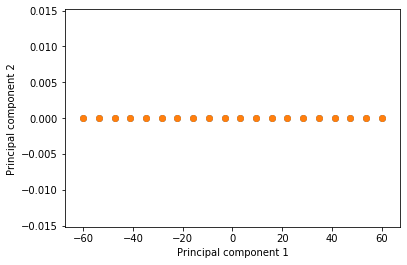

In [37]:
Visualization(fic_vec)

In [38]:
x_train, y_train, x_test, y_test = our_train_and_split(fic_target,fic_vec,0.75)

30


In [39]:
score_df = GridSearchCV_TrainSetResult(x_train, y_train, x_test, y_test, 5)
score_df

C:\Users\Liat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model,best_score,best_params
0,logistic_regression,1.000000,"{'C': 100, 'penalty': 'l2'}"
1,svm,1.000000,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'sigm..."
2,random_forest,0.966667,"{'max_features': 'sqrt', 'n_estimators': 10}"
3,knn,1.000000,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
4,decision_tree,0.966667,"{'max_depth': 2, 'min_samples_split': 2}"
5,bagged_decision_trees,0.966667,{'n_estimators': 10}
6,stochastic_gradient_boosting,0.966667,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es..."
7,sgd,0.966667,{'penalty': 'l1'}
8,naive_bayes,1.000000,{}


In [40]:
score_df["best_params"][3]

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

In [41]:
KNN_Classifier(x_train, y_train, x_test, y_test, 'euclidean', 3, 'uniform')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


<br>

<br>

### First Classification try:

#### Build vectors from the prevalence of each group in each file

In [42]:
patientsdf= pd.read_excel("before_and_after.xlsx")
if "Unnamed: 0" in patientsdf.columns:
    patientsdf = patientsdf.drop(columns="Unnamed: 0")
patientsdf.head()

,Patient,Noun Before,1st Body Before,ConciousWord Before,Verb Before,Past Before,Present Before,Future Before,Other Before,Adjective Before,...,Verb Ratio,Past Ratio,Present Ratio,Future Ratio,Other Ratio,Adjective Ratio,Adverb Ratio,Infinitive Ratio,Emotion Ratio,Name Ratio
0,0,0.225,0.077,0.031,0.187,0.112,0.075,0.000,0.311,0.059,...,1.191,0.991,2.206,0.000,1.280,1.341,0.778,0.906,1.625,0.667
1,1,0.217,0.114,0.010,0.189,0.100,0.071,0.018,0.243,0.044,...,1.005,1.010,1.000,1.000,0.946,0.978,1.131,0.857,0.800,1.000
2,2,0.156,0.096,0.001,0.186,0.131,0.050,0.014,0.279,0.036,...,0.903,0.766,1.429,1.750,1.187,1.800,1.109,1.107,3.333,0.300
3,3,0.168,0.091,0.008,0.171,0.104,0.053,0.014,0.281,0.068,...,1.082,1.010,1.152,1.400,1.115,1.511,0.918,0.839,2.500,1.125
4,4,0.242,0.094,0.015,0.156,0.099,0.044,0.013,0.252,0.068,...,1.020,0.971,0.863,1.182,0.920,1.333,0.861,1.632,0.778,1.800


In [29]:
patientsdf.columns

Index(['Patient', 'Noun Before', '1st Body Before', 'ConciousWord Before',
       'Verb Before', 'Past Before', 'Present Before', 'Future Before',
       'Other Before', 'Adjective Before', 'Adverb Before',
       'Infinitive Before', 'Emotion Before', 'Name Before', 'Noun After',
       '1st Body After', 'ConciousWord After', 'Verb After', 'Past After',
       'Present After', 'Future After', 'Other After', 'Adjective After',
       'Adverb After', 'Infinitive After', 'Emotion After', 'Name After',
       'Noun Ratio', '1st Body Ratio', 'ConciousWord Ratio', 'Verb Ratio',
       'Past Ratio', 'Present Ratio', 'Future Ratio', 'Other Ratio',
       'Adjective Ratio', 'Adverb Ratio', 'Infinitive Ratio', 'Emotion Ratio',
       'Name Ratio'],
      dtype='object')

In [30]:
file_vectors = []
target = []
for i in range(0,len(afterArr)):
    target.append(0)
    target.append(1)
    file_vectors.append([patientsdf.iloc[i,col] for col in range(1,14)])
    file_vectors.append([patientsdf.iloc[i,col] for col in range(14,27)])

In [189]:
file_vectors[0]

[0.225,
 0.077,
 0.031,
 0.187,
 0.112,
 0.075,
 0.0,
 0.311,
 0.059,
 0.07,
 0.029,
 0.013,
 0.002]

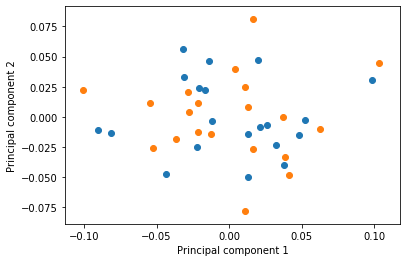

In [190]:
Visualization(file_vectors)

In [107]:
x_train, y_train, x_test, y_test = our_train_and_split(target,file_vectors,0.75)

30


In [108]:
score_df = GridSearchCV_TrainSetResult(x_train, y_train, x_test, y_test, 5)
score_df

,model,best_score,best_params
0,logistic_regression,0.566667,"{'C': 100, 'penalty': 'l2'}"
1,svm,0.600000,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}"
2,random_forest,0.733333,"{'max_features': 'log2', 'n_estimators': 10}"
3,knn,0.633333,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei..."
4,decision_tree,0.533333,"{'max_depth': 2, 'min_samples_split': 3}"
5,bagged_decision_trees,0.566667,{'n_estimators': 100}
6,stochastic_gradient_boosting,0.666667,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."
7,sgd,0.533333,{'penalty': 'l2'}
8,naive_bayes,0.666667,{}


In [109]:
SVM_Classifier(x_train, y_train, x_test, y_test, 'rbf', 2, 'scale')

Accuracy: 0.5
Precision: 0.5
Recall: 0.6


In [110]:
RANDOMFFOREST_Classifier(x_train, y_train, x_test, y_test, 'log2', 10)

Accuracy: 0.4
Precision: 0.4
Recall: 0.4


<br>

<br>

<br>

### Second Classification Try:

#### From Average-words dataframe that contains the prevalence of all words, we will examine which are the most prominent words, the words with the largest or smallest reduction between patient's files before and after treatment.

In [19]:
avg_words_df = pd.read_excel("averageWord.xlsx")
if "Unnamed: 0" in avg_words_df.columns:
    avg_words_df = avg_words_df.drop(columns="Unnamed: 0")
    
avg_words_df.head()

,word,Avg word Before,Avg word After
0,conciousword,0.036396,0.037275
1,pst1fst,0.027635,0.027506
2,לא,0.028374,0.024660
3,זה,0.017402,0.018088
4,אני,0.015712,0.015629


In [20]:
reduction = []
for i,row in avg_words_df.iterrows():
    reduction.append(tuple([ row["word"], row["Avg word Before"]-row["Avg word After"] ]))

prominent_words = [ tup[0] for tup in reduction if tup[1] in sorted([tup[1] for tup in reduction], reverse=True)[:10] ]
neg_reduction = [ tup[0] for tup in reduction if tup[1] in sorted([tup[1] for tup in reduction])[:10] ]

In [21]:
#20 words, 10 words with the highest incidence in pre-treatment files versus post-treatment files, and 10 with the smallest incidence.
for w in neg_reduction:
    prominent_words.append(w)

In [22]:
# The 10 words that stand out most in pre-treatment files versus post-treatment files
prominent_words[:10]

['לא',
 'spectoken',
 'break',
 'שלי',
 'כל',
 'שהיא',
 'והוא',
 'הביתה',
 'לעשות',
 'לביה']

In [23]:
# The 10 words that stand out most in post-treatment files versus pre-treatment files
prominent_words[10:]

['conciousword',
 'את',
 'היה',
 'לי',
 'pres1st',
 'של',
 'אבל',
 'גם',
 'אה',
 'חושבת']

In [24]:
len(prominent_words)

20

#### We will create vector per file.<br> Each vector will contain the prevalence of each of the dominant words. <br>In addition we will add to each vector the prevalence of conciouswords, names, adjective, future and emotions in file .<br>This details we found interesting in patientsdf.<br>Another figure to consider is the length of a file

In [25]:
def SumProminentWordinFile(file):

    return [sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), file)) / len(file.split()) for word in prominent_words]

In [28]:
patient = []
file_vectors =[]
for i,f_a in enumerate(afterArr):
    
    #Prevalence of each of the dominant words
    vec_before = SumProminentWordinFile(beforeArr[i])
    vec_after = SumProminentWordinFile(f_a)
    #Prevalence of conciouswords
    vec_before.append(patientsdf.loc[i,"ConciousWord Before"])
    vec_after.append(patientsdf.loc[i,"ConciousWord After"])
    #Prevalence of names
    vec_before.append(patientsdf.loc[i,"Name Before"])
    vec_after.append(patientsdf.loc[i,"Name After"])
    #Prevalence of adjective
    vec_before.append(patientsdf.loc[i,"Adjective Before"])
    vec_after.append(patientsdf.loc[i,"Adjective After"])
    #Prevalence of future
    vec_before.append(patientsdf.loc[i,"Future Before"])
    vec_after.append(patientsdf.loc[i,"Future After"])
    #Prevalence of emotions
    vec_before.append(patientsdf.loc[i,"Emotion Before"])
    vec_after.append(patientsdf.loc[i,"Emotion After"])
    #length of a file
    vec_before.append(len(beforeArr[i].split()))
    vec_after.append(len(f_a.split()))

    file_vectors.append(vec_before)
    file_vectors.append(vec_after)

    #nun patient
    patient.append(i+1)
    patient.append(i+1)

    
target = [i%2 for i in range(0,len(file_vectors))]

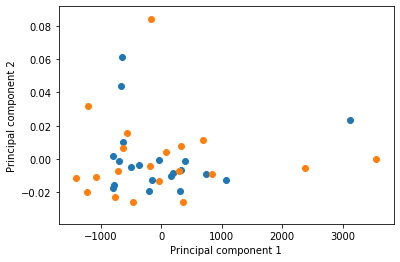

In [29]:
Visualization(file_vectors)

In [30]:
x_train, y_train, x_test, y_test = our_train_and_split(target,file_vectors,0.75)

30


In [31]:
score_df = GridSearchCV_TrainSetResult(x_train, y_train, x_test, y_test, 5)
score_df

C:\Users\Liat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model,best_score,best_params
0,logistic_regression,0.733333,"{'C': 100, 'penalty': 'l2'}"
1,svm,0.666667,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'sigm..."
2,random_forest,0.700000,"{'max_features': 'sqrt', 'n_estimators': 100}"
3,knn,0.700000,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei..."
4,decision_tree,0.600000,"{'max_depth': 10, 'min_samples_split': 15}"
5,bagged_decision_trees,0.733333,{'n_estimators': 100}
6,stochastic_gradient_boosting,0.766667,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es..."
7,sgd,0.500000,{'penalty': 'l1'}
8,naive_bayes,0.500000,{}


In [32]:
score_df["best_params"][3]

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

In [35]:
KNN_Classifier(x_train, y_train, x_test, y_test, 'euclidean', 9, 'uniform')

Accuracy: 0.5
Precision: 0.5
Recall: 0.8


In [33]:
KNN_Classifier(x_train, y_train, x_test, y_test, 'euclidean', 13, 'distance')

Accuracy: 0.6
Precision: 0.5714285714285714
Recall: 0.8


In [34]:
KNN_Classifier(x_train, y_train, x_test, y_test, 'euclidean', 3, 'uniform')

Accuracy: 0.6
Precision: 0.5714285714285714
Recall: 0.8


In [90]:
RANDOMFFOREST_Classifier(x_train, y_train, x_test, y_test, 'log2', 1000)

Accuracy: 0.8
Precision: 1.0
Recall: 0.6


#### Scaling only lengh file prameter

In [36]:
len_lst = [v[-1] for v in file_vectors]
max_len = max(len_lst)
min_len = min(len_lst)

In [37]:
without_len_x_train= [v[:-1] for v in x_train]
without_len_x_test= [v[:-1] for v in x_test]

In [38]:
scale_len_only_x_train=[]
for i,v in enumerate(without_len_x_train):
    temp= v
    temp.append((x_train[i][-1]-min_len)/(max_len-min_len))
    scale_len_only_x_train.append(temp)
    
scale_len_only_x_test=[]    
for i,v in enumerate(without_len_x_test):
    temp= v
    temp.append((x_test[i][-1]-min_len)/(max_len-min_len))
    scale_len_only_x_test.append(temp)

In [39]:
score_df = GridSearchCV_TrainSetResult(scale_len_only_x_train, y_train, scale_len_only_x_test, y_test, 5)
score_df

C:\Users\Liat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model,best_score,best_params
0,logistic_regression,0.733333,"{'C': 10, 'penalty': 'l2'}"
1,svm,0.733333,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'sigm..."
2,random_forest,0.633333,"{'max_features': 'sqrt', 'n_estimators': 1000}"
3,knn,0.733333,"{'metric': 'manhattan', 'n_neighbors': 13, 'we..."
4,decision_tree,0.600000,"{'max_depth': 15, 'min_samples_split': 3}"
5,bagged_decision_trees,0.600000,{'n_estimators': 10}
6,stochastic_gradient_boosting,0.766667,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est..."
7,sgd,0.666667,{'penalty': 'l1'}
8,naive_bayes,0.666667,{}


In [40]:
score_df["best_params"][3]

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [52]:
RANDOMFFOREST_Classifier(scale_len_only_x_train, y_train, scale_len_only_x_test, y_test,'sqrt', 1000)

Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 1.0


In [50]:
RANDOMFFOREST_Classifier(scale_len_only_x_train, y_train, scale_len_only_x_test, y_test,'log2', 10)

Accuracy: 0.8
Precision: 0.8
Recall: 0.8


In [60]:
SVM_Classifier(scale_len_only_x_train, y_train, scale_len_only_x_test, y_test, 'sigmoid', 0.001, 'scale')

Accuracy: 0.5
Precision: 0.5
Recall: 0.8


In [61]:
KNN_Classifier(x_train, y_train, x_test, y_test, 'manhattan', 13, 'uniform')

Accuracy: 0.5
Precision: 0.5
Recall: 0.8


In [ ]:
x_train

#### scaling our vectors

In [65]:
#tring scaling our vectors
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_file_vectors = scaler.fit(file_vectors).transform(file_vectors)
scale_file_vectors[0]

array([0.41429256, 0.3438831 , 0.19294157, 0.40585477, 0.78022516,
       0.57898049, 0.        , 0.        , 0.        , 0.        ,
       0.06354007, 0.59939654, 0.        , 0.19823789, 0.24874135,
       0.46449754, 0.60707688, 0.33012115, 0.34471366, 0.        ,
       0.68888889, 0.        , 0.67241379, 0.        , 0.37037037,
       0.01869531])

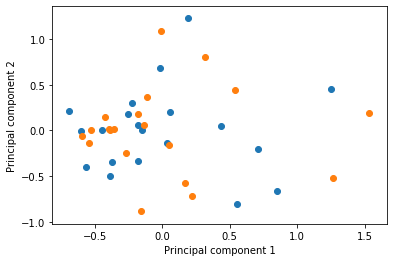

In [66]:
Visualization(scale_file_vectors)

In [67]:
scale_x_train, y_train, scale_x_test, y_test = our_train_and_split(target,file_vectors,0.75)

30


In [68]:
score_df = GridSearchCV_TrainSetResult(scale_x_train, y_train, scale_x_test, y_test, 5)
score_df

C:\Users\Liat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model,best_score,best_params
0,logistic_regression,0.700000,"{'C': 100, 'penalty': 'l2'}"
1,svm,0.633333,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}"
2,random_forest,0.666667,"{'max_features': 'sqrt', 'n_estimators': 100}"
3,knn,0.700000,"{'metric': 'euclidean', 'n_neighbors': 21, 'we..."
4,decision_tree,0.500000,"{'max_depth': 3, 'min_samples_split': 21}"
5,bagged_decision_trees,0.600000,{'n_estimators': 10}
6,stochastic_gradient_boosting,0.700000,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
7,sgd,0.500000,{'penalty': 'l1'}
8,naive_bayes,0.500000,{}


In [69]:
score_df["best_params"][3]

{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}

In [77]:
RANDOMFFOREST_Classifier(x_train, y_train, x_test, y_test, 'log2', 10)

Accuracy: 0.8
Precision: 0.7142857142857143
Recall: 1.0


In [148]:
KNN_Classifier(x_train, y_train, x_test, y_test, 'euclidean', 3, 'uniform')

Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 1.0


In [150]:
SVM_Classifier(scale_x_train, y_train, scale_x_test, y_test, 'rbf', 0.7, 'scale')

Accuracy: 0.7
Precision: 0.75
Recall: 0.6


#### The vectors didn't include the file length parameter.

In [83]:
file_vectors_without_len = [vec[:-1] for vec in file_vectors]

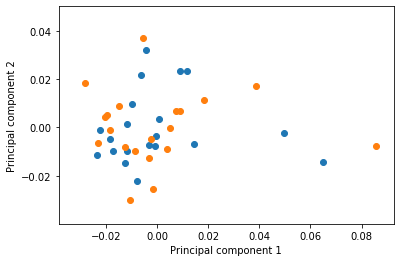

In [84]:
Visualization(file_vectors_without_len)

In [85]:
x_train_without_len_param, y_train, x_test_without_len_param, y_test = our_train_and_split(target, file_vectors_without_len, 0.75)

30


In [86]:
x_train_without_len_param = [vec[:-1] for vec in x_train]
x_test_without_len_param = [vec[:-1] for vec in x_test]

In [89]:
score_df = GridSearchCV_TrainSetResult(scale_x_train, y_train, scale_x_test, y_test, 5)
score_df

C:\Users\Liat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,model,best_score,best_params
0,logistic_regression,0.700000,"{'C': 100, 'penalty': 'l2'}"
1,svm,0.633333,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}"
2,random_forest,0.666667,"{'max_features': 'log2', 'n_estimators': 100}"
3,knn,0.700000,"{'metric': 'euclidean', 'n_neighbors': 21, 'we..."
4,decision_tree,0.500000,"{'max_depth': 3, 'min_samples_split': 21}"
5,bagged_decision_trees,0.633333,{'n_estimators': 1000}
6,stochastic_gradient_boosting,0.700000,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est..."
7,sgd,0.500000,{'penalty': 'l1'}
8,naive_bayes,0.500000,{}


In [178]:
RANDOMFFOREST_Classifier(x_train_without_len_param, y_train, x_test_without_len_param, y_test, 'sqrt', 100)

Accuracy: 0.7
Precision: 0.625
Recall: 1.0


In [90]:
SVM_Classifier(x_train_without_len_param, y_train, x_test_without_len_param, y_test, 'poly', 0.1, 'scale')

Accuracy: 0.5
Precision: 0.5
Recall: 1.0


In [93]:
KNN_Classifier(x_train, y_train, x_test, y_test, 'euclidean', 3, 'uniform')

Accuracy: 0.6
Precision: 0.5714285714285714
Recall: 0.8


<br>

<br>

<br>